In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
# Учитывая наличие в данных крупных ценовых единиц, выраженных в рублях, чтобы избежать использования научной нотации

In [2]:
df_house = pd.read_csv('Data/rent_apartment_moscow.csv')
df_house.head()

,Unnamed: 0,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area
0,0,Baumanskaia,80000,13,walk,agency,50,127,5,8,2,50,30,6
1,1,Kommunarka,27000,3,transport,owner,0,23,12,15,1,38,17,12
2,2,Michurinskii prospekt,150000,5,walk,realtor,0,56,17,24,4,130,70,15
3,3,Khovrino,47000,10,walk,realtor,50,748,6,17,2,55,32,9
4,4,Planernaia,39000,10,walk,realtor,50,835,8,9,1,33,18,7


In [3]:
df_house = df_house.drop(['Unnamed: 0'], axis=1)
df_house.tail()

,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area
4236,No data,1167517,0,walk,agency,0,106,7,7,4,64,64,64
4237,No data,1000000,0,walk,agency,0,118,2,4,6,64,64,64
4238,No data,727039,0,walk,agency,0,54,1,3,8,64,64,64
4239,No data,700000,0,walk,agency,0,77,4,48,5,64,64,64
4240,No data,1167517,0,walk,agency,0,122,1,3,6,64,64,64


In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4241 entries, 0 to 4240
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   metro         4241 non-null   object
 1   price         4241 non-null   int64 
 2   minutes       4241 non-null   int64 
 3   way           4241 non-null   object
 4   provider      4241 non-null   object
 5   fee_percent   4241 non-null   int64 
 6   views         4241 non-null   int64 
 7   storey        4241 non-null   int64 
 8   storeys       4241 non-null   int64 
 9   rooms         4241 non-null   object
 10  total_area    4241 non-null   int64 
 11  living_area   4241 non-null   int64 
 12  kitchen_area  4241 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 430.9+ KB


In [5]:
df_house.describe() #Наблюдала за данными и нашли выбросы

,price,minutes,fee_percent,views,storey,storeys,total_area,living_area,kitchen_area
count,4241.00,4241.00,4241.00,4241.00,4241.00,4241.00,4241.00,4241.00,4241.00
mean,184890.68,8.57,28.26,40.31,9.43,82.96,64.38,49.22,30.26
std,332685.84,6.90,28.68,115.41,34.81,2389.19,40.69,28.74,25.91
min,2700.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,2.00
25%,45000.00,3.00,0.00,11.00,3.00,9.00,42.00,23.00,9.00
50%,65000.00,8.00,40.00,22.00,6.00,14.00,64.00,53.00,13.00
75%,200000.00,13.00,50.00,38.00,11.00,18.00,64.00,64.00,64.00
max,5837585.00,57.00,100.00,5304.00,2113.00,131923.00,494.00,388.00,67.00


In [6]:
df_zscore = df_house['price']
df_zscore_storey = df_house['storey']
df_zscore_storeys = df_house['storeys']

In [7]:
z_score = (df_zscore - df_zscore.mean())/df_zscore.std()
z_score_storey = (df_zscore_storey - df_zscore_storey.mean())/df_zscore_storey.std()
z_score_storeys = (df_zscore_storeys - df_zscore_storeys.mean())/df_zscore_storeys.std()

In [8]:
z_score
z_score_storey
z_score_storeys

0      -0.03
1      -0.03
2      -0.02
3      -0.03
4      -0.03
        ... 
4236   -0.03
4237   -0.03
4238   -0.03
4239   -0.01
4240   -0.03
Name: storeys, Length: 4241, dtype: float64

In [9]:
df_house['z_score_price'] = z_score
df_house['z_score_storey']= z_score_storey
df_house['z_score_storeys']= z_score_storeys
df_house

,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area,z_score_price,z_score_storey,z_score_storeys
0,Baumanskaia,80000,13,walk,agency,50,127,5,8,2,50,30,6,-0.32,-0.13,-0.03
1,Kommunarka,27000,3,transport,owner,0,23,12,15,1,38,17,12,-0.47,0.07,-0.03
2,Michurinskii prospekt,150000,5,walk,realtor,0,56,17,24,4,130,70,15,-0.10,0.22,-0.02
3,Khovrino,47000,10,walk,realtor,50,748,6,17,2,55,32,9,-0.41,-0.10,-0.03
4,Planernaia,39000,10,walk,realtor,50,835,8,9,1,33,18,7,-0.44,-0.04,-0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236,No data,1167517,0,walk,agency,0,106,7,7,4,64,64,64,2.95,-0.07,-0.03
4237,No data,1000000,0,walk,agency,0,118,2,4,6,64,64,64,2.45,-0.21,-0.03
4238,No data,727039,0,walk,agency,0,54,1,3,8,64,64,64,1.63,-0.24,-0.03
4239,No data,700000,0,walk,agency,0,77,4,48,5,64,64,64,1.55,-0.16,-0.01


In [10]:
df_house['z_score_price_judge'] = df_house['z_score_price'] > 2.2
df_house['z_score_storey_judge'] = df_house['z_score_storey'] > 2.2
df_house['z_score_storeys_judge'] = df_house['z_score_storey'] > 2.2

In [11]:
df_rent = df_house[(df_house['z_score_price_judge'] == False) & (df_house['z_score_storey_judge'] == False) & (df_house['z_score_storeys_judge'] == False)]
df_rent #Удаление выбросов цены, этажа и кол-этажа

,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area,z_score_price,z_score_storey,z_score_storeys,z_score_price_judge,z_score_storey_judge,z_score_storeys_judge
0,Baumanskaia,80000,13,walk,agency,50,127,5,8,2,50,30,6,-0.32,-0.13,-0.03,False,False,False
1,Kommunarka,27000,3,transport,owner,0,23,12,15,1,38,17,12,-0.47,0.07,-0.03,False,False,False
2,Michurinskii prospekt,150000,5,walk,realtor,0,56,17,24,4,130,70,15,-0.10,0.22,-0.02,False,False,False
3,Khovrino,47000,10,walk,realtor,50,748,6,17,2,55,32,9,-0.41,-0.10,-0.03,False,False,False
4,Planernaia,39000,10,walk,realtor,50,835,8,9,1,33,18,7,-0.44,-0.04,-0.03,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,No data,750000,0,walk,agency,0,71,1,5,6,64,64,64,1.70,-0.24,-0.03,False,False,False
4231,No data,902666,0,walk,agency,0,131,2,12,4,64,64,64,2.16,-0.21,-0.03,False,False,False
4232,No data,650000,0,walk,agency,0,112,67,73,3,64,64,64,1.40,1.65,-0.00,False,False,False
4238,No data,727039,0,walk,agency,0,54,1,3,8,64,64,64,1.63,-0.24,-0.03,False,False,False


In [12]:
df_rent.rename(columns = {'metro': 'Метро',
                           'price': 'Цена',
                           'minutes': 'Минуты',
                           'way': 'Путь',
                           'provider': 'Провайдер',
                           'fee_percent': 'Процент агентства',
                           'views': 'Просмотров',
                           'storey': 'Этаж',
                           'storeys': 'Этажность всего',
                           'rooms': 'Кол-комнат',
                           'total_area': 'Общая_площадь',
                           'living_area': 'Жилая_площадь',
                           'kitchen_area': 'Кухня_площадь'}, inplace=True)
df_rent#Переименовать на русском

/var/folders/tn/_70hg6tj035g42snbnmglwwr0000gn/T/ipykernel_20149/3738364893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent.rename(columns = {'metro': 'Метро',


,Метро,Цена,Минуты,Путь,Провайдер,Процент агентства,Просмотров,Этаж,Этажность всего,Кол-комнат,Общая_площадь,Жилая_площадь,Кухня_площадь,z_score_price,z_score_storey,z_score_storeys,z_score_price_judge,z_score_storey_judge,z_score_storeys_judge
0,Baumanskaia,80000,13,walk,agency,50,127,5,8,2,50,30,6,-0.32,-0.13,-0.03,False,False,False
1,Kommunarka,27000,3,transport,owner,0,23,12,15,1,38,17,12,-0.47,0.07,-0.03,False,False,False
2,Michurinskii prospekt,150000,5,walk,realtor,0,56,17,24,4,130,70,15,-0.10,0.22,-0.02,False,False,False
3,Khovrino,47000,10,walk,realtor,50,748,6,17,2,55,32,9,-0.41,-0.10,-0.03,False,False,False
4,Planernaia,39000,10,walk,realtor,50,835,8,9,1,33,18,7,-0.44,-0.04,-0.03,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,No data,750000,0,walk,agency,0,71,1,5,6,64,64,64,1.70,-0.24,-0.03,False,False,False
4231,No data,902666,0,walk,agency,0,131,2,12,4,64,64,64,2.16,-0.21,-0.03,False,False,False
4232,No data,650000,0,walk,agency,0,112,67,73,3,64,64,64,1.40,1.65,-0.00,False,False,False
4238,No data,727039,0,walk,agency,0,54,1,3,8,64,64,64,1.63,-0.24,-0.03,False,False,False


In [13]:
df_rent.describe()

,Цена,Минуты,Процент агентства,Просмотров,Этаж,Этажность всего,Общая_площадь,Жилая_площадь,Кухня_площадь,z_score_price,z_score_storey,z_score_storeys
count,4103.00,4103.00,4103.00,4103.00,4103.00,4103.00,4103.00,4103.00,4103.00,4103.00,4103.00,4103.00
mean,139868.92,8.74,29.18,39.57,8.54,16.30,63.37,48.23,29.35,-0.14,-0.03,-0.03
std,165441.78,6.89,28.68,116.73,8.34,13.64,37.81,27.30,25.69,0.50,0.24,0.01
min,2700.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,2.00,-0.55,-0.27,-0.03
25%,45000.00,4.00,0.00,11.00,3.00,9.00,41.00,22.00,9.00,-0.42,-0.18,-0.03
50%,65000.00,9.00,50.00,22.00,6.00,14.00,64.00,49.00,12.00,-0.36,-0.10,-0.03
75%,150000.00,13.00,50.00,37.00,11.00,18.00,64.00,64.00,64.00,-0.10,0.05,-0.03
max,902666.00,57.00,100.00,5304.00,80.00,97.00,410.00,308.00,67.00,2.16,2.03,0.01


In [14]:
df_rent['Провайдер'].value_counts()

agency       2287
developer    1523
owner         236
realtor        57
Name: Провайдер, dtype: int64

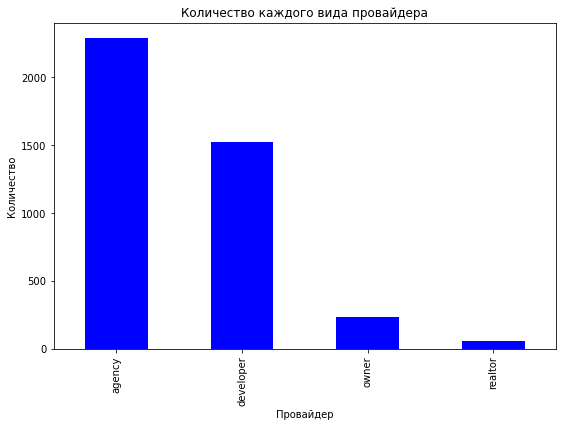

In [15]:
df_rent['Провайдер'].value_counts().plot(kind = 'bar',
                                     color = 'b',
                                     xlabel = 'Провайдер',
                                     ylabel = 'Количество',
                                     title = 'Количество каждого вида провайдера', figsize = (9,6))
plt.show()

In [16]:
df_rent.groupby('Провайдер')['Цена'].mean()

Провайдер
agency      192484.45
developer    74600.08
owner        70293.64
realtor      60789.44
Name: Цена, dtype: float64

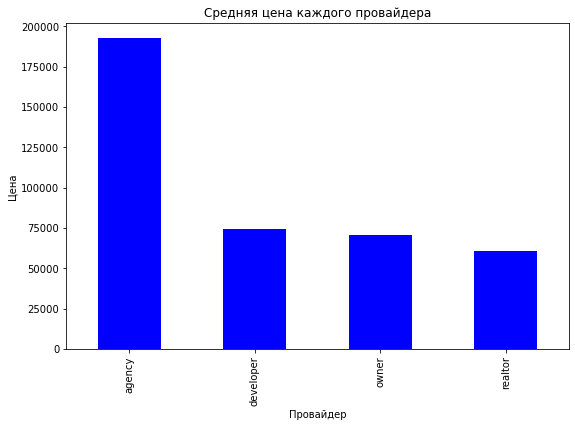

In [17]:
df_rent.groupby('Провайдер')['Цена'].mean().plot(kind = 'bar',
                                     color = 'b',
                                     xlabel = 'Провайдер',
                                     ylabel = 'Цена',
                                     title = 'Средняя цена каждого провайдера', figsize = (9,6))
plt.show()

<AxesSubplot:title={'center':'Средный процент агентства каждого провайдера'}, xlabel='Провайдер', ylabel='Процент агентства'>

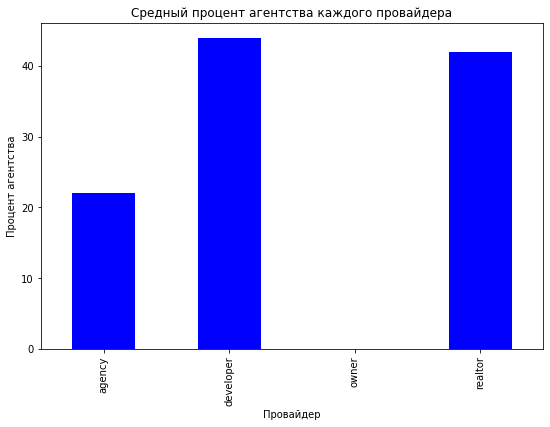

In [18]:
df_rent.groupby('Провайдер')['Процент агентства'].mean().plot(kind='bar', 
                                          figsize=(9,6),
                                         color='b',
                                         xlabel='Провайдер',
                                         ylabel='Процент агентства',
                                         title='Средный процент агентства каждого провайдера')

#Из четырех провайдеров аренда у агентов является самой дорогой и имеет самые высокие агентские ставки. Но они предлагают наибольший выбор недвижимости для аренды. Что касается арендодателей, то у них почти нулевые агентские ставки и третий по величине средний размер арендной платы, что является относительно хорошим показателем. Таким образом, выбор формы аренды в большей степени зависит от бюджета арендатора. Если вы хотите платить немного меньше каждый месяц, то лучше выбирать между арендодателями и розничными торговцами.

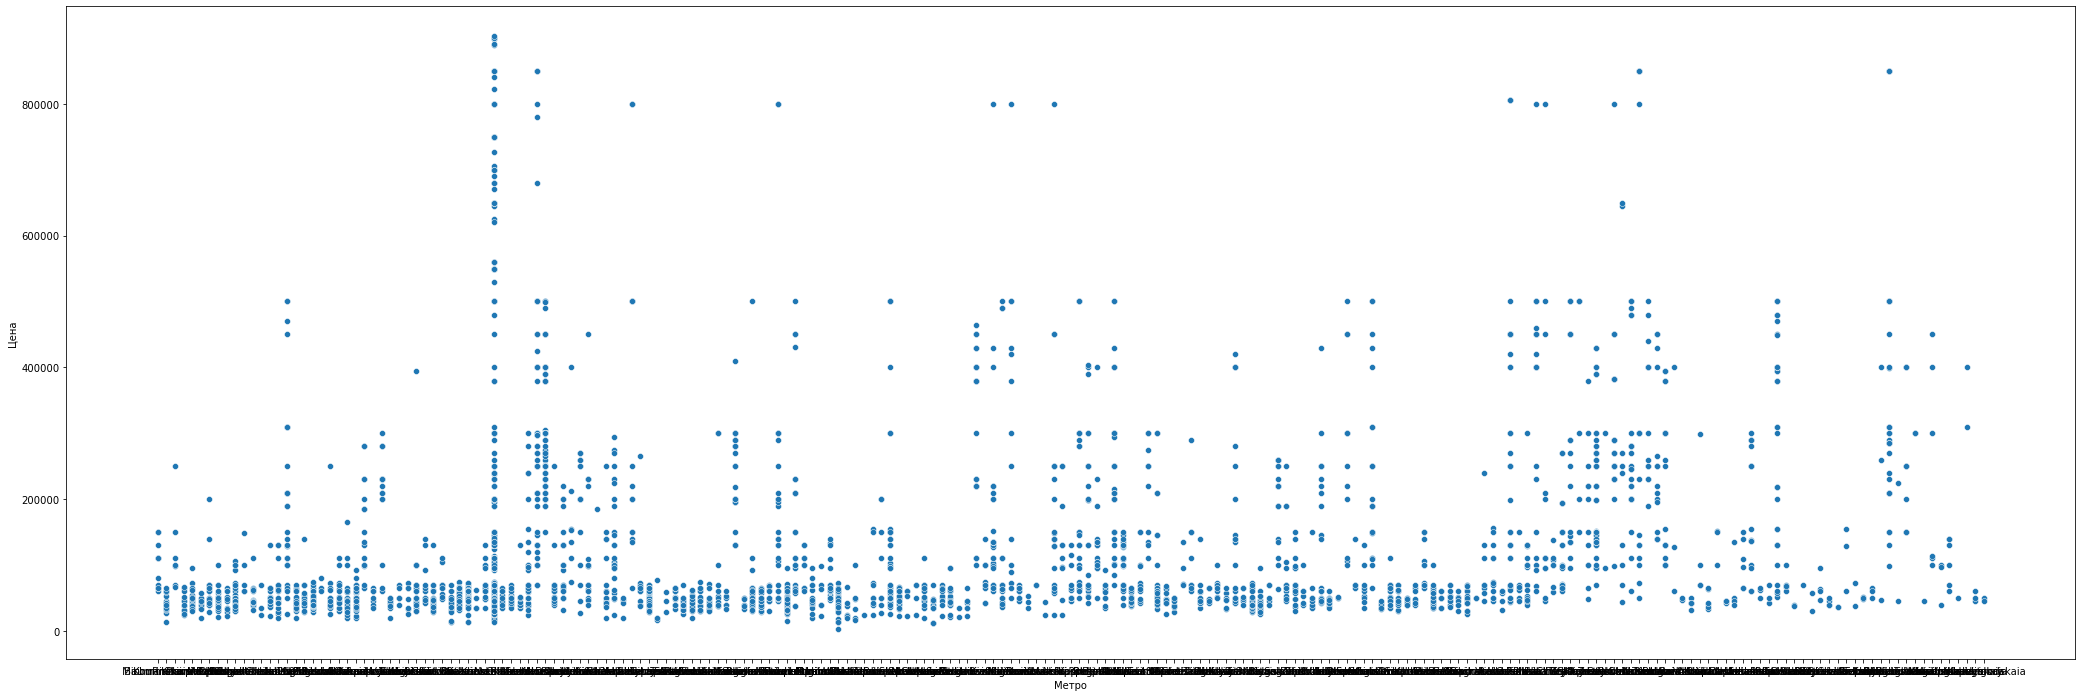

In [19]:
data = df_rent[['Цена', 'Метро']]
plt.figure(1, figsize=(36,12))
sns.scatterplot(x='Метро', y='Цена', data=data)
plt.show()

/Users/alexjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


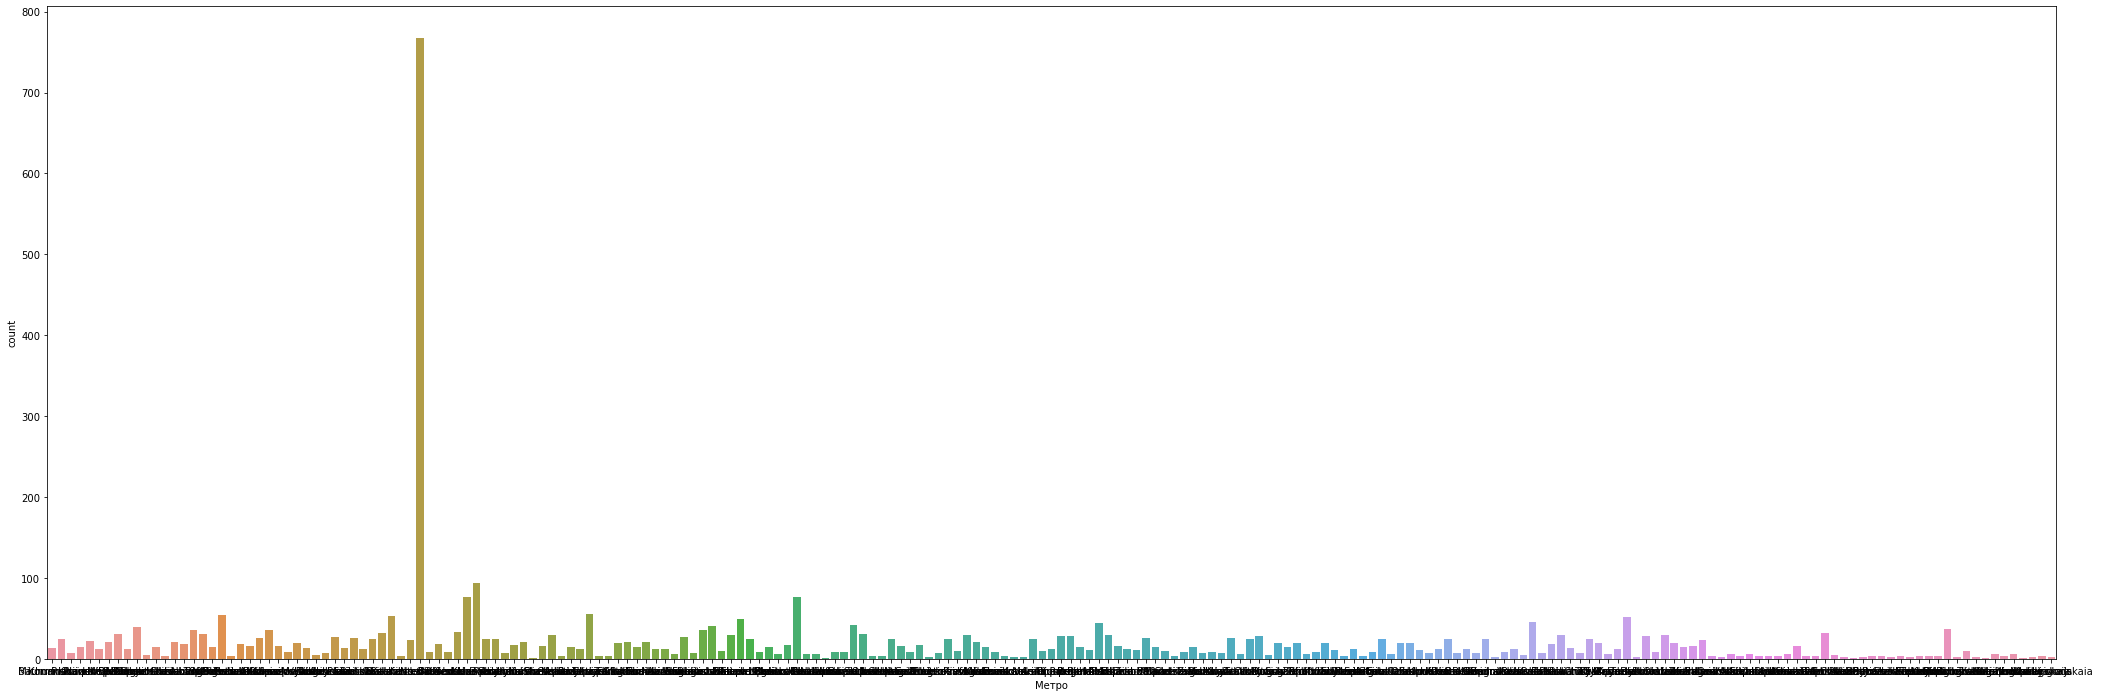

In [20]:
plt.figure(1, figsize=(36,12))
sns.countplot(df_rent['Метро'])
plt.show()

/Users/alexjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


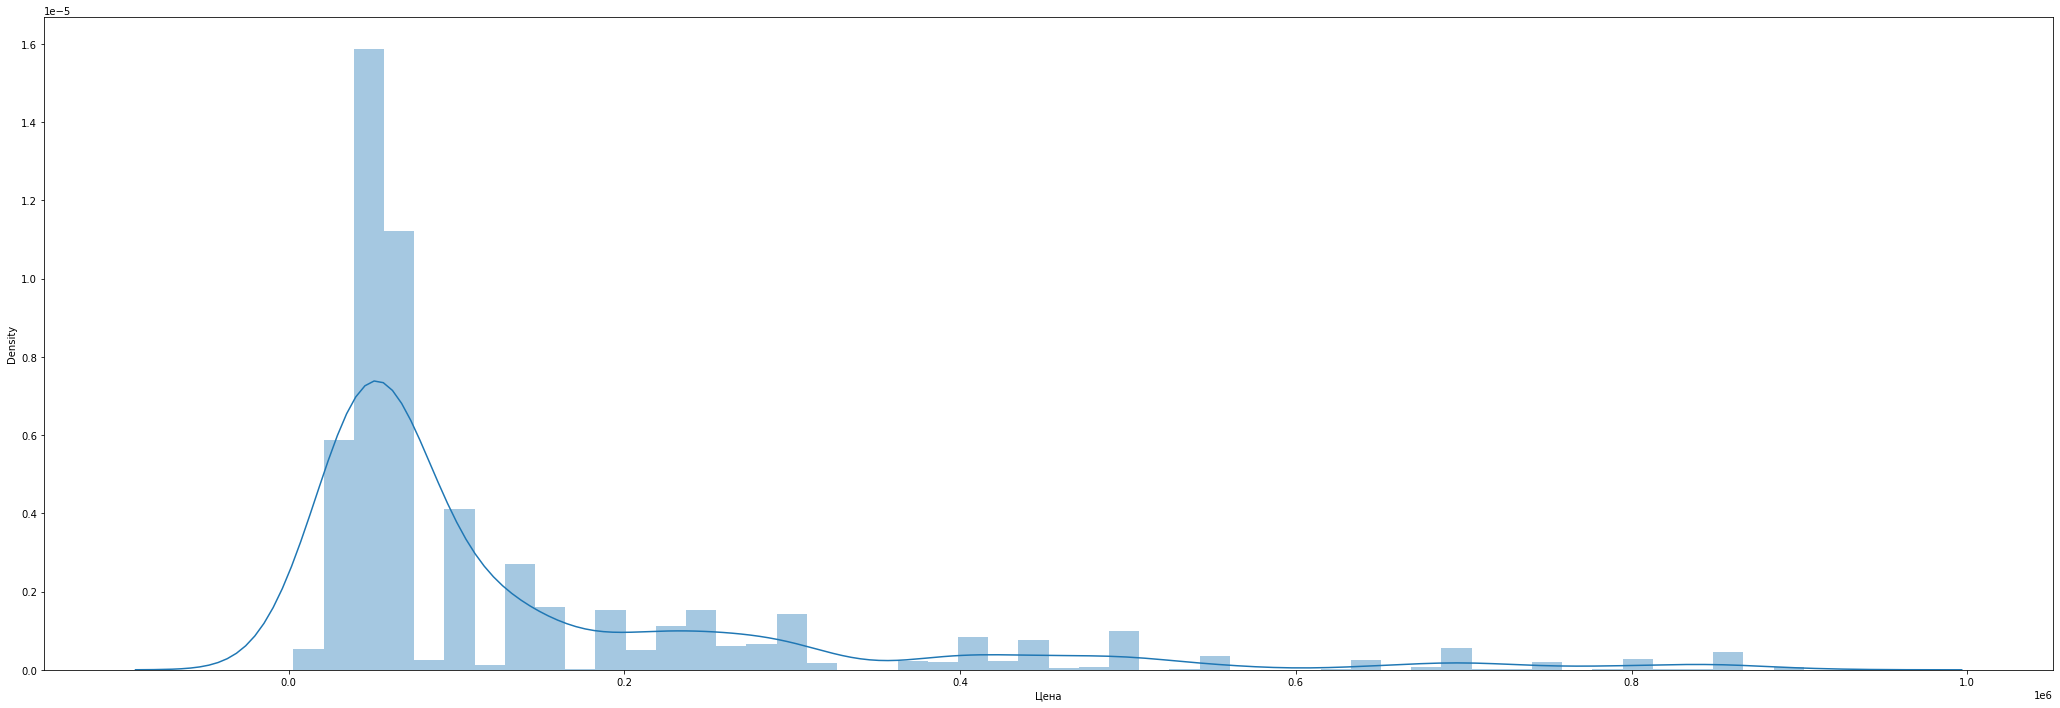

In [21]:
plt.figure(1, figsize=(36,12))
sns.distplot(df_rent['Цена'])
plt.show()

# Гистограмма распределения цен выглядит следующим образом, и нам ясно, что.

Распределение цен отклоняется от нормального распределения
Наблюдается явное явление положительного перекоса
Есть четкие пики

Цены на большинство домов в Москве находятся в диапазоне 200 000 рублей

<AxesSubplot:>

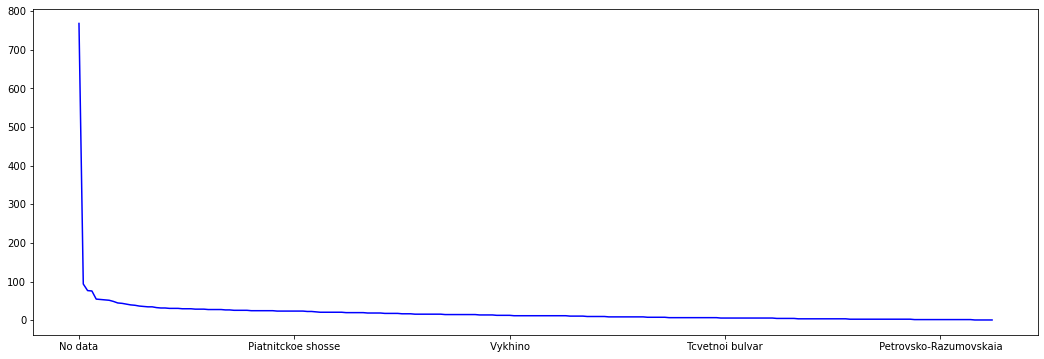

In [30]:
df_rent['Метро'].value_counts().plot(figsize = (18,6), color='b')

#Платниковое шоссе, Выхино, Цветной булар, Петровско-Разумовская - район станции метро которые представляют найбольшие варианты аренды в Москве.

In [23]:
df_rent.groupby('Метро')['Просмотров'].sum().sort_values

<bound method Series.sort_values of Метро
 Aeroport              403
 Akademicheskaia       539
 Alekseevskaia         764
 Alma-Atinskaia        221
 Altufevo              992
                     ...  
 Vykhino              4084
 Vystavochnaia          95
 Zhulebino             205
 Ziablikovo            185
No data              23168
Name: Просмотров, Length: 213, dtype: int64>

<AxesSubplot:title={'center':'Средние просмотры за каждый метро'}, xlabel='Метро', ylabel='Просмотров'>

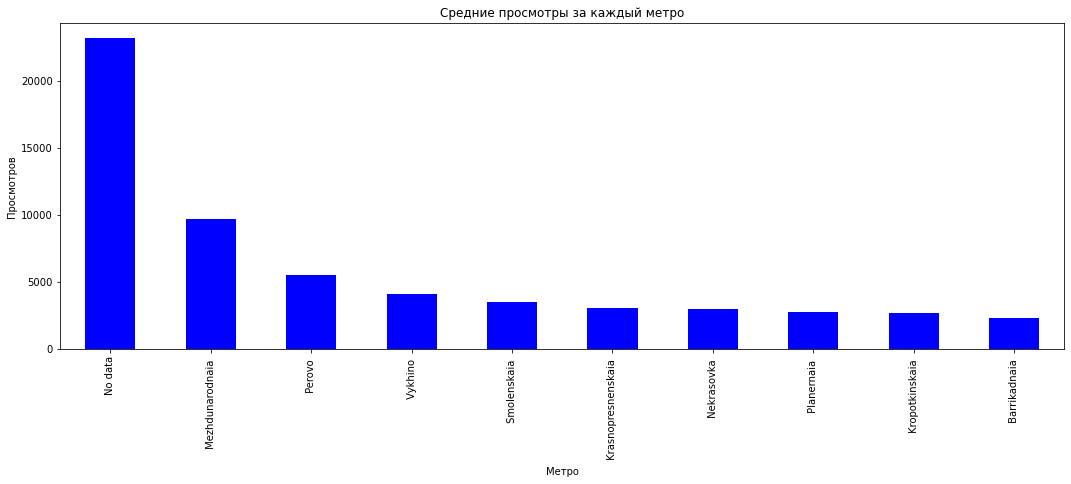

In [24]:
df_rent[['Метро', 'Просмотров']].groupby(by='Метро').sum().round(decimals=1).sort_values(by='Просмотров', ascending=False).head(10).plot(
    kind ='bar',
    figsize = (18,6),
    color='b',
    legend= None,
    title='Средние просмотры за каждый метро',
    xlabel='Метро',
    ylabel='Просмотров')

#Международная, Перово, Выхино, Смоленская, Кранопресненская - самые популярные районы для арендаторов в Москве.

<AxesSubplot:xlabel='Цена'>

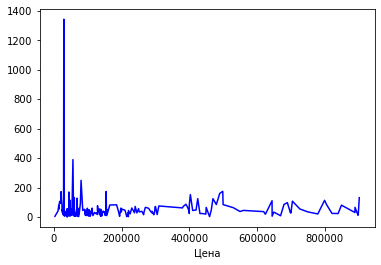

In [29]:
df_rent.groupby('Цена')['Просмотров'].mean().plot(color='b')

In [26]:
def get_price_cat(Цена):
    if Цена <= 30000:
        return 'дешевый'
    elif Цена <= 50000:
        return 'средний'
    elif Цена <= 100000:
        return 'высокий'
    elif Цена > 100000:
        return 'очень высокий'

In [27]:
df_rent['Цена_кат'] = pd.Categorical(df_rent['Цена'].apply(get_price_cat))
df_rent['Цена_кат'].value_counts()

/var/folders/tn/_70hg6tj035g42snbnmglwwr0000gn/T/ipykernel_20149/3495531198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent['Цена_кат'] = pd.Categorical(df_rent['Цена'].apply(get_price_cat))


очень высокий    1429
средний          1368
высокий          1136
дешевый           170
Name: Цена_кат, dtype: int64

<AxesSubplot:>

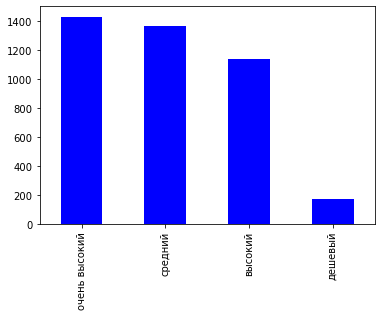

In [32]:
df_rent['Цена_кат'].value_counts().plot(kind='bar', color='b')

In [33]:
data_2 = df_rent[['Цена_кат', 'Цена', 'Просмотров']]
data_2.groupby(['Цена_кат', 'Просмотров'])['Цена'].value_counts().to_frame()

Цена
Цена_кат Просмотров Цена        
высокий  0          100000     6
                    60000      3
                    65000      3
                    51900      2
                    70000      2
...                          ...
средний  748        47000      1
         835        39000      1
         1170       45000      1
         1471       45000      1
         1624       45000      1

[2494 rows x 1 columns]

Чем ниже цена, тем больше людей любят посмотреть ее, в относительном выражении, и можно предположить, что предпочтение отдается экономические варианты.

<AxesSubplot:ylabel='Путь'>

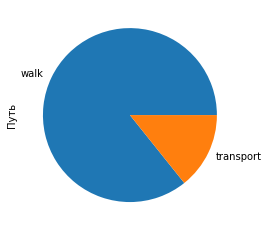

In [34]:
data_3 = df_rent['Путь']
data_3.value_counts().plot(kind='pie')

In [35]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4103 entries, 0 to 4239
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Метро                  4103 non-null   object  
 1   Цена                   4103 non-null   int64   
 2   Минуты                 4103 non-null   int64   
 3   Путь                   4103 non-null   object  
 4   Провайдер              4103 non-null   object  
 5   Процент агентства      4103 non-null   int64   
 6   Просмотров             4103 non-null   int64   
 7   Этаж                   4103 non-null   int64   
 8   Этажность всего        4103 non-null   int64   
 9   Кол-комнат             4103 non-null   object  
 10  Общая_площадь          4103 non-null   int64   
 11  Жилая_площадь          4103 non-null   int64   
 12  Кухня_площадь          4103 non-null   int64   
 13  z_score_price          4103 non-null   float64 
 14  z_score_storey         4103 non-null   f

In [38]:
df_rent.drop(['z_score_price', 'z_score_storey', 'z_score_storeys', 'z_score_price_judge', 'z_score_storey_judge', 'z_score_storeys_judge'], axis=1, inplace=True)
corr_rent = df_rent.corr()
corr_rent

/var/folders/tn/_70hg6tj035g42snbnmglwwr0000gn/T/ipykernel_20149/607405704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent.drop(['z_score_price', 'z_score_storey', 'z_score_storeys', 'z_score_price_judge', 'z_score_storey_judge', 'z_score_storeys_judge'], axis=1, inplace=True)


,Цена,Минуты,Процент агентства,Просмотров,Этаж,Этажность всего,Общая_площадь,Жилая_площадь,Кухня_площадь
Цена,1.00,-0.22,-0.51,0.09,0.16,0.16,0.46,0.55,0.34
Минуты,-0.22,1.00,0.12,-0.01,-0.04,-0.04,-0.07,-0.08,-0.07
Процент агентства,-0.51,0.12,1.00,-0.06,-0.11,-0.11,-0.41,-0.51,-0.36
Просмотров,0.09,-0.01,-0.06,1.00,0.02,0.04,0.05,0.04,0.01
Этаж,0.16,-0.04,-0.11,0.02,1.00,0.76,0.03,0.06,0.13
Этажность всего,0.16,-0.04,-0.11,0.04,0.76,1.00,0.01,0.07,0.17
Общая_площадь,0.46,-0.07,-0.41,0.05,0.03,0.01,1.00,0.83,0.11
Жилая_площадь,0.55,-0.08,-0.51,0.04,0.06,0.07,0.83,1.00,0.50
Кухня_площадь,0.34,-0.07,-0.36,0.01,0.13,0.17,0.11,0.50,1.00


<AxesSubplot:>

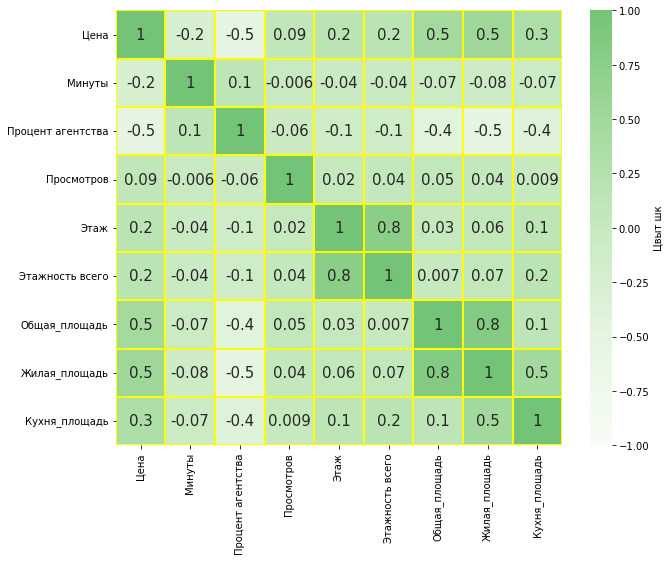

In [39]:
plt.figure(figsize = (10,8))
matrix = np.triu(corr_rent)
sns.heatmap(corr_rent, annot = True, 
            center = 1, 
            linecolor = 'yellow', 
            linewidth = 2,
            annot_kws = {'size': 15},
           cmap = 'Greens',
           vmax = 1,
           vmin = -1,
           fmt = '.1g',
           cbar_kws = {'label': 'Цвыт шк'})

В дополнение к расположению станции метро, цена дома в Москве также положительно связана с размером дома и отрицательно связана с комиссией агента.